JOB 0

In [15]:
k = int(input('Enter your number :'))

def factorial(n):
    if (n == 0):
        return 1
    else:
        return n*factorial(n-1)
    
print(k, 'factorial = ' ,factorial(k))

Enter your number :0
0 factorial =  1


JOB 01

In [22]:
k = int(input('Enter your number :'))

def power(n):
    x=3
    if n==0:
        return 1
    else:
        return x*power(n-1)
print('3 ^',k,'= ',power(k))


Enter your number :3
3 ^ 3 =  27


JOB 3

In [205]:
import numpy as np

k = int(input('Enter your number :'))


def dame(n):
    plateau = np.zeros((n,n),'str')
    plateau[:,:]='o'
    l=[]
    for i in range(8):
        col = np.random.randint(0, 8)
        if col not in l:
            plateau[i][col] ='x'
            l.append(col)
        else:
            col = np.random.randint(0, 8)
            plateau[i][col] ='x'
            l.append(col)            

    return plateau
        
    

dame(k)   
    

Enter your number :8


array([['o', 'x', 'o', 'o', 'o', 'o', 'o', 'o'],
       ['o', 'o', 'x', 'o', 'o', 'o', 'o', 'o'],
       ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'x'],
       ['o', 'o', 'o', 'o', 'o', 'o', 'x', 'o'],
       ['o', 'o', 'o', 'x', 'o', 'o', 'o', 'o'],
       ['o', 'o', 'o', 'o', 'o', 'o', 'x', 'o'],
       ['o', 'x', 'o', 'o', 'o', 'o', 'o', 'o'],
       ['x', 'o', 'o', 'o', 'o', 'o', 'o', 'o']], dtype='<U1')

JOB 8

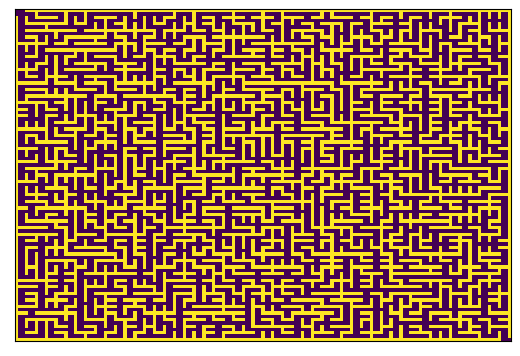

In [207]:
# Read and build mazes
def replaceCharactersBy0s1s(line):
    return [1 if i=="#" else 0 for i in line.replace('\n', '')]

def readMaze(file):
    with open(file) as f:
        maze = [replaceCharactersBy0s1s(line) for line in f]
    return maze


filename = "maze.mz.txt"
maze =readMaze(filename)


# Visualisation
import matplotlib.pyplot as plt
fig = plt.figure(frameon=False)
plt.imshow(maze)
plt.xticks([])
plt.yticks([])

plt.show()


In [210]:
import random

class Coordinates:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return "x:{} y:{}".format(self.x, self.y)

class Node:
    def __init__(self, left=None, right=None, top=None, bot=None, coordinates=None):
        self.left = left
        self.right = right
        self.top = top
        self.bot = bot
        self.coordinates = coordinates

    def getNodes(self):
        nodes = set()
        for i in [self.left, self.right, self.top, self.bot]:
            if i != None:
                nodes.add(i)
        return nodes

    def getNodeRandomly(self):
        return self.getNodes()[random.randint(0, 3)]

class MazeGraph:
    def __init__(self, start:Node, finish:Node):
        self.start = start
        self.finish = finish

    def findExitDepthFirstSearch(self):
        visitedNodes = set()
        stack=[self.start,]
        visitedNodes.add(self.start)
        destination = self.finish

        while True:
            #print(stack[-1])
            if stack[-1] is destination:
                return stack

            distance = len(stack)
            for n in stack[-1].getNodes():
                if n not in visitedNodes:
                    stack.append(n)
                    visitedNodes.add(n)
                    break

            if distance == len(stack):
                stack.pop()

def toMazeGraph(rawMaze):
    xmax = len(rawMaze[0])-1
    ymax = len(rawMaze)-1
    for y in range(ymax+1):
        for x in range(xmax+1):
            if rawMaze[y][x] != None:
                rawMaze[y][x].coordinates = Coordinates(x=x,y=y)
                if x!=0 and rawMaze[y][x-1]!=None:
                    rawMaze[y][x].left = rawMaze[y][x-1]

                if x!=xmax and rawMaze[y][x+1]!=None:
                    rawMaze[y][x].right = rawMaze[y][x+1]

                if y!=ymax and rawMaze[y+1][x]!=None:
                    rawMaze[y][x].top = rawMaze[y+1][x]

                if y!=0 and rawMaze[y-1][x]!=None:
                    rawMaze[y][x].bot = rawMaze[y-1][x]
    return MazeGraph(start=rawMaze[0][0], finish=rawMaze[ymax][xmax])

def replaceCharacters(line:list):
    return [None if i=="#" else Node() for i in line.replace('\n', '')]

def readRawMaze(file):
    with open(file) as f:
        rawMaze = [replaceCharacters(line) for line in f]
    return rawMaze

def applyAlgorithm(algorithm, maze, xmax, ymax,):
    return algorithm(maze, xmax, ymax)

def buildMaze(lines, collumns, maze=-1, x=-1, y=-1):

    maze = [[1]*collumns*2-1 for i in range(lines*2-1)]
    for i in lines:
        pass
    maze.insert(0, [1]*collumns)
    maze.append([1]*collumns)
    for i in maze:
        i.insert(0,1)
        i.append(1)
    applyAlgorithm(maze, xmax=collumns, ymax=lines)
    maze[0][0] = maze[lines+1][collumns+1] = 0
    maze[1][0] = maze[lines][collumns+1] = 0
    return maze


In [211]:
filename = "maze.mz.txt"
rawMaze = readRawMaze(filename)
mazeGraph = toMazeGraph(rawMaze)
solutionNodes = mazeGraph.findExitDepthFirstSearch()
solutionCoordinates = [[node.coordinates.x, node.coordinates.y] for node in solutionNodes]
#print(solutionCoordinates)


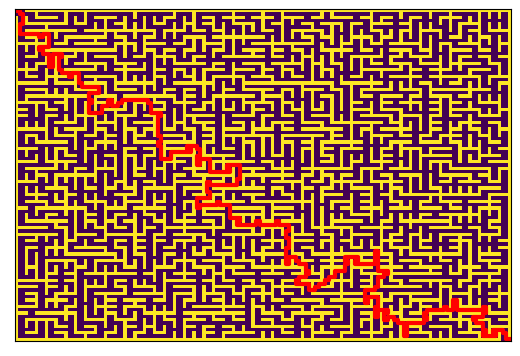

In [212]:
import numpy as np
x = 0
y = 0
for i in range(1, len(solutionCoordinates)): 
  x = np.append(x, solutionCoordinates[i][0])
  y = np.append(y, solutionCoordinates[i][1])
    
# Visualisation
import matplotlib.pyplot as plt

plt.figure()
plt.plot((x), (y), color="red", linewidth=3)
plt.imshow(maze)
plt.xticks([])
plt.yticks([])
plt.show()

JOB 15

In [222]:
char_1 = input('Fourniez premier chaine de caractères :')
char_1=char_1.lower()
char_2 = input('Fourniez premier chaine de caractères :')
char_2=char_2.lower()



    

Fourniez premier chaine de caractères :hghf2
Fourniez premier chaine de caractères :hjbh


In [234]:
def compare():
    if char_1 == char_2:
        print(0) 

    for i in range(len(char_1)):
        l_1=ord(char_1[i])-ord('a')

